# Power of Feature Engineering
Compare the performance of logistic regression to a DNN Classifier on a non-linear dataset. This is to show that similar accuracy, to the DNN, can be acheived by using logistic regression with transformations of the data. 

## Prepare Data

In [4]:
import numpy as np
import pandas as pd

n_points = 2000

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (0.5 * age) +2*(performance) + age**2 + 1000*age/performance -10000 + 1000*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

print(sum(y))
data.head()


500


,age,performance,y
0,39.12,2.706353,1
1,28.88,4.887444,0
2,21.72,3.996998,0
3,44.96,3.436718,1
4,42.41,-6.808404,0


In [5]:
#data.to_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
data = pd.read_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
sum(data['y'])

494

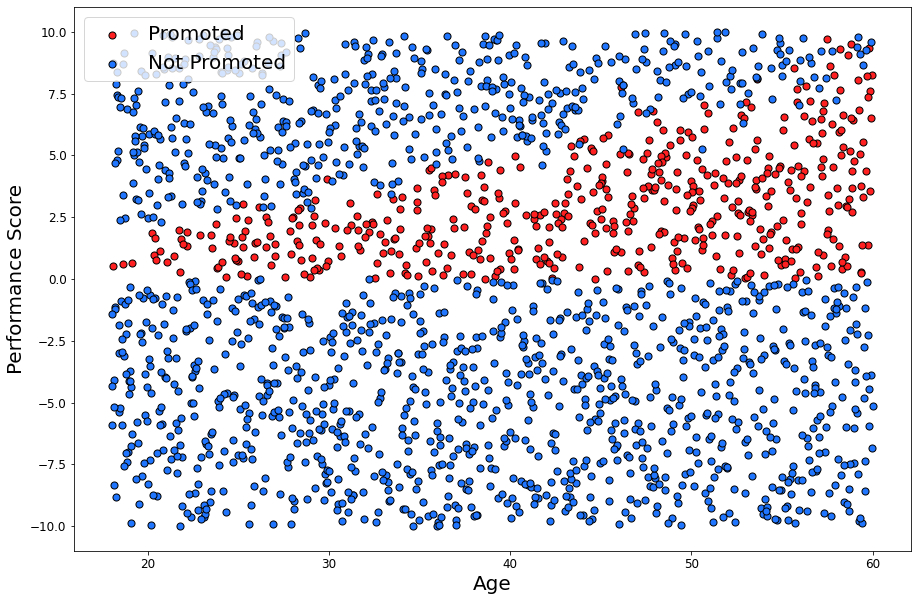

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure1.png',format='png')

## Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

x = data[['age','performance']]
sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit() #fit logistic regression model

predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))

Optimization terminated successfully.
         Current function value: 0.560887
         Iterations 5
65.17


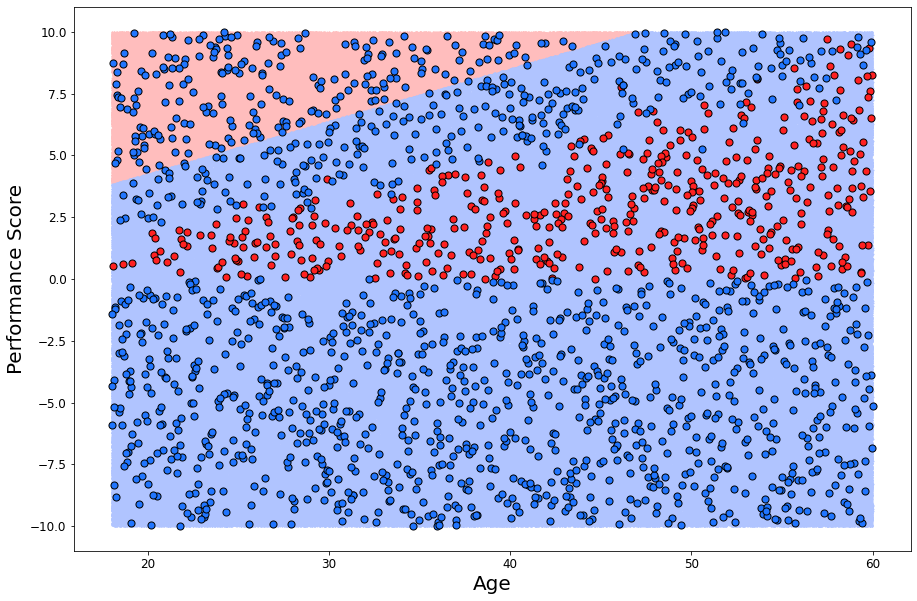

In [8]:
n_points = 1000000 #use many point to visualise decision boundry

age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)

performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age':age_db,'performance':performance_db})

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure2.png',format='png')

### Add transformations and interactions

In [10]:
data['age_sqrd'] = age**2
data['age_perf_ratio'] = age/performance

x = data[['age','performance','age_sqrd','age_perf_ratio']]
x = sm.add_constant(x)
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit(disp=0) #fit new logistic regression model

predictions = np.around(model.predict(x_test))
metric.accuracy_score(y_test,predictions) 

0.745

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1395
Method:                           MLE   Df Model:                            4
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.1504
Time:                        20:58:55   Log-Likelihood:                -664.16
converged:                       True   LL-Null:                       -781.73
Covariance Type:            nonrobust   LLR p-value:                 1.035e-49
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.6359      0.286    -12.715      0.000      -4.196      -3.075
age                0.0580      0.006      9.721      0.000       0.046       0.070
performance        0.1409      0.013     10.978      0.000       0.116       0.166
age_sqrd        8.366e-06   7.07e-05      0.118      0.906      -0.000       0.000
age_perf_ratio -1.673e-05      0.000     -0.076      0.939      -0.000       0.000
==================================================================================
"""

In [13]:
#Update decision boundry points
data_db.drop('y',axis=1,inplace=True)
data_db['age_sqrd'] = data_db['age']**2
data_db['age_perf_ratio'] = data_db['age']/data_db['performance']
sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figureFinal.png',format='png')

KeyError: "['y'] not found in axis"

## DNN Classifier


In [40]:
from keras.models import Sequential
from keras.layers import Dense

x = data[['age','performance']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=10) #fit ANN

accuracy = model.evaluate(x_test, y_test)
print(round(accuracy[1]*100,2))

Epoch 1/100
1400/1400 [==============================] - 0s 194us/step - loss: 1.5827 - accuracy: 0.2771
Epoch 2/100
1400/1400 [==============================] - 0s 97us/step - loss: 0.5322 - accuracy: 0.6421
Epoch 3/100
1400/1400 [==============================] - 0s 103us/step - loss: 0.4448 - accuracy: 0.6986
Epoch 4/100
1400/1400 [==============================] - 0s 119us/step - loss: 0.3940 - accuracy: 0.7800
Epoch 5/100
1400/1400 [==============================] - 0s 117us/step - loss: 0.3126 - accuracy: 0.8743
Epoch 6/100
1400/1400 [==============================] - 0s 128us/step - loss: 0.2280 - accuracy: 0.9364
Epoch 7/100
1400/1400 [==============================] - 0s 109us/step - loss: 0.1959 - accuracy: 0.9636
Epoch 8/100
1400/1400 [==============================] - 0s 106us/step - loss: 0.1723 - accuracy: 0.9671
Epoch 9/100
1400/1400 [==============================] - 0s 105us/step - loss: 0.1568 - accuracy: 0.9700
Epoch 10/100
1400/1400 [==============================] 

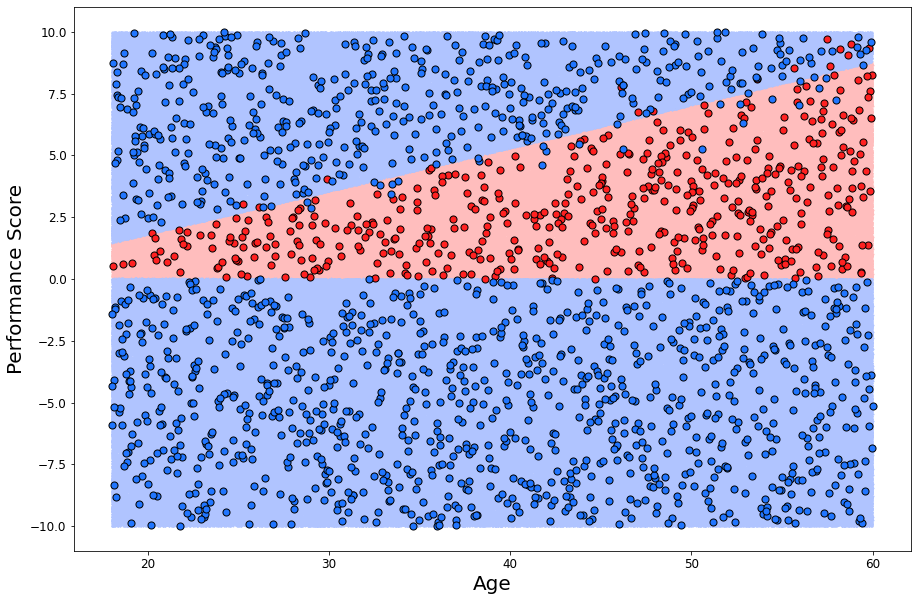

In [41]:
#make predictions on the decision boundry points
predictions = model.predict(data_db[['age','performance']])
y_db = np.around(predictions )
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure_ann.png',format='png')